In [ ]:
"""
data load

"""

import cv2
import os
import numpy as np
from glob import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
import natsort


def load_data(PATH, split=0.21):
    images = natsort.natsorted(glob(os.path.join(PATH, "/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/*")))
    masks = natsort.natsorted(glob(os.path.join(PATH, "/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/*")))

    print(images)
    print(masks)

    total_size = len(images)
    total_mask_size = len(masks)
    valid_size = int(split * total_size)
    test_size = int(split * total_size)

    print("total_number_of_images:", total_size)
    
    print("total_mask_images:", total_mask_size)
    print("valid_size:", valid_size)
    print("test_size:", test_size)


    train_x, valid_x = train_test_split(
             images,
             test_size=valid_size,
             random_state=42
     )
    train_y, valid_y = train_test_split(
             masks,
             test_size=valid_size,
             random_state=42
     )

    train_x, test_x = train_test_split(
             images,
             test_size=test_size,
             random_state=42
     )
    train_y, test_y = train_test_split(
             masks,
             test_size=test_size,
             random_state=42
     )

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


def read_image(PATH):
     PATH = PATH.decode()
     x = cv2.imread(PATH, cv2.IMREAD_COLOR)
     x = cv2.resize(x, (128, 128))
     x = x/255.0
     return x


def read_mask(PATH):
     PATH = PATH.decode()
     x = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)
     x = cv2.resize(x, (128, 128))
     x = x/255.0
     x = np.expand_dims(x, axis=-1)
     return x


def tf_parse(sx, sy):
     def _parse(x, y):
         x = read_image(x)
         y = read_mask(y)
         return x, y

     sx, sy = tf.numpy_function(_parse, [sx, sy], [tf.float64, tf.float64])
     sx.set_shape([128, 128, 3])
     sy.set_shape([128, 128, 1])
     return sx, sy


def tf_dataset(x, y, batch=8):
     dataset = tf.data.Dataset.from_tensor_slices((x, y))
     dataset = dataset.map(tf_parse)
     dataset = dataset.batch(batch)
     dataset = dataset.repeat()
     return dataset


if __name__ == "__main__":
     PATH = "/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/datasets/"
     (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(PATH)

     print("Training data x: ", len(train_x))
     print("Training data y: ", len(train_y))
     print("Validation data x: ", len(valid_x))
     print("Validation data y: ", len(valid_y))
     print("Testing data x: ", len(test_x))
     print("Testing data y: ", len(test_y))
     print(" ")

     ds = tf_dataset(test_x, test_y)
     for x, y in ds:
         print(x.shape, y.shape)
         print('test_x:', test_x)
         print('test_y:', test_y)
         print('-----')
         print('train_x:', train_x)
         print('train_y:', train_y)
         print('-----')
         print('valid_x:', valid_x)
         print('valid_y:', valid_y)
         print('-----')
         break
'''
# put all the content in a dict
tostore=dict(zip(['X_train', 'X_test', 'y_train', 'y_test' ], [train, test, y_train, y_test))
# open a file with context manager
with open('REP'+str(n),'wb') as filestore: 
    pkl.dump(tostore,filestore) # write dict to file
    #pkl.load() #load back the data

joblib.dump(train_test_split, "/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/datasets/")
#my_train_test_split = joblib.load(path)

'''

['/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_0.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_1.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_2.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_3.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_4.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_5.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_6.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_7.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_8.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resiz

'\n# put all the content in a dict\ntostore=dict(zip([\'X_train\', \'X_test\', \'y_train\', \'y_test\' ], [train, test, y_train, y_test))\n# open a file with context manager\nwith open(\'REP\'+str(n),\'wb\') as filestore: \n    pkl.dump(tostore,filestore) # write dict to file\n    #pkl.load() #load back the data\n\njoblib.dump(train_test_split, "/content/drive/MyDrive/Colab Notebooks/My work/billboard_segnet/datasets/")\n#my_train_test_split = joblib.load(path)\n\n'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 256)      0

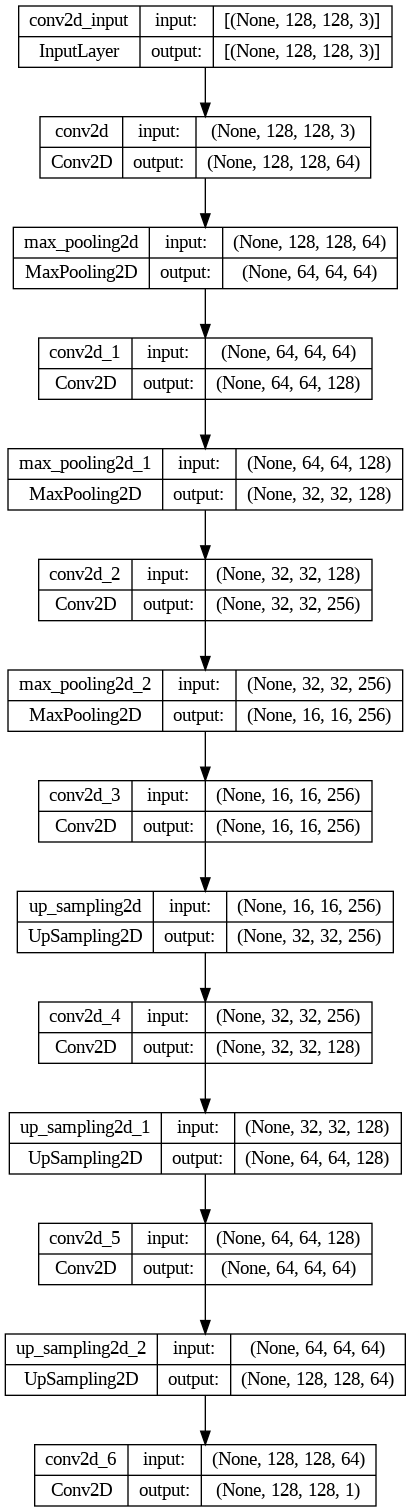

In [ ]:
'''
create  seg net model

'''

# Import the required libraries.
from tensorflow.keras.layers import (
        Activation,
        Conv2DTranspose,
        Input,
        BatchNormalization,
        Add,
        Conv2D, 
        MaxPooling2D, 
        UpSampling2D
)
from tensorflow.keras.models import Sequential, Model


# ### Train the deep learning model
#def cloudsegNet():

''' 
 input_img = Input(shape=(128, 128, 1)) # (300, 300, 3)

 x = Convolution2D(16, 3, 3, activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
 x = MaxPooling2D((2, 2), padding='same')(x)
 x = Convolution2D(8, 3, 3, activation='relu', padding='same')(x)
 x = MaxPooling2D((2, 2), padding='same')(x)
 x = Convolution2D(8, 3, 3, activation='relu', padding='same')(x)
 encoded = MaxPooling2D((2, 2), padding='same')(x)

 #print("shape of encoded", K.int_shape(encoded)



#==============================================================================


 x = Convolution2D(8, 3, 3, activation='relu', padding='same')(encoded)
 x = UpSampling2D((2, 2))(x)
 x = Convolution2D(8, 3, 3, activation='relu', padding='same')(x)
 x = UpSampling2D((2, 2))(x)
 x = Convolution2D(16, 3, 3, activation='relu', padding='same')(x)
 x = UpSampling2D((2, 2))(x)

 decoded = Convolution2D(1, 5, 5, activation='sigmoid', padding='same')(x)
 #print("shape of decoded", K.int_shape(decoded))

 autoencoder = Model(input_img, decoded)
 autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
 '''

billboard_segnet_model = Sequential()
billboard_segnet_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
billboard_segnet_model.add(MaxPooling2D((2, 2), padding='same'))
billboard_segnet_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
billboard_segnet_model.add(MaxPooling2D((2, 2), padding='same'))
billboard_segnet_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
billboard_segnet_model.add(MaxPooling2D((2, 2), padding='same'))
#print("shape of encoded", K.int_shape(encoded)

     
billboard_segnet_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
billboard_segnet_model.add(UpSampling2D((2, 2)))
billboard_segnet_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
billboard_segnet_model.add(UpSampling2D((2, 2)))
billboard_segnet_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
billboard_segnet_model.add(UpSampling2D((2, 2)))

billboard_segnet_model.add(Conv2D(1, (1, 1), activation='sigmoid', padding='same'))
#print("shape of decoded", K.int_shape(decoded)

 #Using binary cross entropy loss. Try other losses. 
billboard_segnet_model.summary()
tf.keras.utils.plot_model(billboard_segnet_model, show_shapes=True)#show_shapes=True


#if __name__ == "__main__":
 #   billboard_cloudsegnet_model = cloudsegNet()
  #  billboard_cloudsegnet_model.summary()
    #tf.keras.utils.plot_model(billboard_cloudsegnet_model)#show_shapes=True


In [ ]:
'''
Train
'''


import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.callbacks import (
        EarlyStopping,
        ModelCheckpoint,
        ReduceLROnPlateau,
        CSVLogger,
        TensorBoard
)
from tensorflow.keras.metrics import Recall, Precision
#from Data import load_data, tf_dataset
#from Model import LinkNet

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)


if __name__ == "__main__":
    PATH = "/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/datasets/"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(PATH)

    BATCH = 8
    lr = 1e-4
    epochs = 50

    train_dataset = tf_dataset(train_x, train_y, batch=BATCH)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=BATCH)
    

    model = billboard_segnet_model
    opt = tf.keras.optimizers.Adam(lr)
    metrics = ["acc", Recall(), Precision(), iou]
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics)

    callbacks = [
        ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/model/model_adsegnet.h5"),
        #ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3),
        CSVLogger("/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/csv_data/data_adsegnet.csv"),
        TensorBoard(),
        #EarlyStopping(
        #   monitor="val_loss",
         #   patience=10,
        #   restore_best_weights=False
        #)
    ]

    train_steps = len(train_x) // BATCH
    valid_steps = len(valid_x) // BATCH
  

    if len(train_x) % BATCH != 0:
        train_steps += 1
    if len(valid_x) % BATCH != 0:
        valid_steps += 1


    adsegnet_model = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=epochs,
        steps_per_epoch=train_steps,
        validation_steps=valid_steps,
        callbacks=callbacks
    )

   

['/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_0.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_1.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_2.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_3.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_4.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_5.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_6.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_7.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_8.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resiz

In [ ]:
test_dataset = tf_dataset(test_x, test_y, batch=BATCH)
test_steps = len(test_x) // BATCH

if len(test_x) % BATCH != 0:
    test_steps += 1

model.evaluate(test_dataset, steps=test_steps)

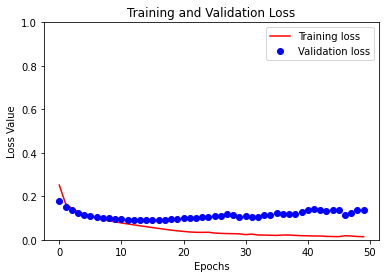

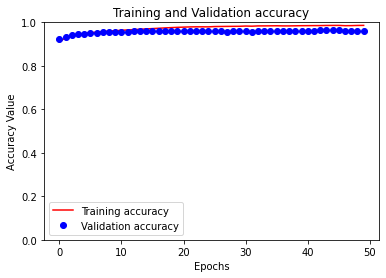

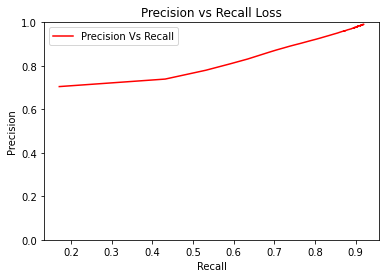

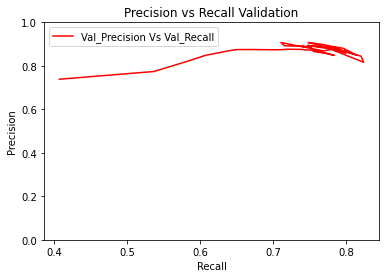

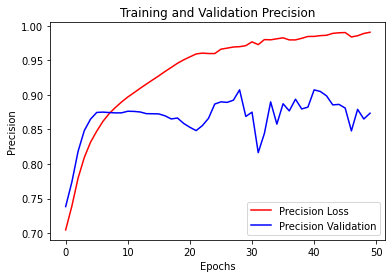

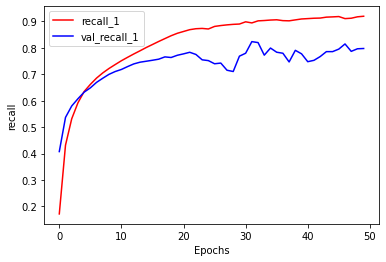

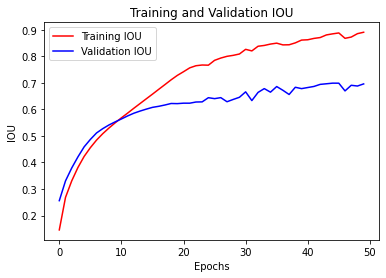

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

epoch = epochs
loss = adsegnet_model.history['loss']
val_loss = adsegnet_model.history['val_loss']

accuracy = adsegnet_model.history['acc']
val_accuracy = adsegnet_model.history['val_acc']

epochs = range(epoch)

plt.figure()
#gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
#plt.subplot(1,2,gridspec_kw={'height_ratios': [3,3]})
#plt.subplot(gs[0])
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
#cmap = plt.cm.jet
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Training_Valdation_Loss.jpg')
plt.show()

plt.figure()
#plt.subplot(1,2,width_ratios=[3, 1])
#plt.subplot(gs[1])
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.ylim([0, 1])
plt.legend()
#cmap = plt.cm.jet
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Training_Validation_Accuracy.jpg')
plt.show()



prec = adsegnet_model.history['precision']
rec = adsegnet_model.history['recall']
rec_acc = adsegnet_model.history['val_recall']
prec_acc = adsegnet_model.history['val_precision']
epochs = range(epoch)

plt.figure()
#gs1=gridspec.GridSpec(1, 2,width_ratios= [3,3])
#plt.subplot(gs1[0])
plt.plot(rec, prec, 'r', label='Precision Vs Recall')
plt.title('Precision vs Recall Loss')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Recall_Precision_Loss.jpg')#, cmap=cmap)
plt.show()

plt.figure()
#plt.subplot(gs1[1])
plt.plot(rec_acc, prec_acc, 'r', label='Val_Precision Vs Val_Recall')
plt.title('Precision vs Recall Validation')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Recall_Precision_Accuracy.jpg')#, cmap=cmap)
plt.show()

plt.figure()
#gs2=gridspec.GridSpec(1,2, width_ratios=[3,3])
#plt.subplot(gs2[0])
plt.plot(epochs, prec, 'r', label='Precision Loss')
plt.plot(epochs, prec_acc, 'b', label='Precision Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Training_Validation_Precision.jpg')
plt.show()

plt.figure()
#plt.subplot(gs2[1])
plt.plot(epochs, rec,'r',label='recall_1')
plt.plot(epochs, rec_acc,'b',label='val_recall_1')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Training_Validation_Recall.jpg')
plt.show()

iou = cloudsegnet_model.history['iou']
val_iou = cloudsegnet_model.history['val_iou'] 

plt.figure()
plt.plot(epochs, iou, 'r', label = 'Training IOU')
plt.plot(epochs, val_iou, 'b', label = 'Validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.title('Training and Validation IOU')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/loss_acc_plot/Training_Validation_IOU.jpg')
plt.show()


In [ ]:
#save model
billboard_adsegnet_model.save('/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/model/billboard_adsegnet.hdf5')

In [ ]:
'''
Predict

'''

#predict

from keras.models import load_model
import h5py
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize
import matplotlib.pyplot as plt
from random import randrange
from PIL import Image
from keras.utils import CustomObjectScope
import glob
import natsort
import cv2
import os
import numpy as np

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

with CustomObjectScope({'iou': iou}):
 adsegnetModel = load_model("/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/model/model_adsegnet.h5")
dims = [128,128] #dimension


class saveimg(object):

  def __init__(self,images):
     self.images = images
     

  def originalimg(self):
    #self.org_array = []
    self.pred_array = []
    resizedwidth=dims[0]#0.25
    wpercent = 128 #(resizedwidth/float(self.images.size[0]))
    resizedheight = 128 #int((float(self.images.size[0])*float(wpercent))) 
    for i in range(len(self.images)):
      self.resized_img = cv2.resize(self.images[i],(128,128))      
      self.array_img = img_to_array(self.resized_img)/255
      self.test_image = np.expand_dims(self.array_img, axis=0)
      self.show_test_image = np.squeeze(self.test_image)
      self.decoded_img = cloud_segnetModel.predict(self.test_image)
      self.show_decoded_image = np.squeeze(self.decoded_img)
      #print(self.show_decoded_image.shape)
      self.show_decoded_image = cv2.resize(self.show_decoded_image,(512,512))
      #print(self.show_decoded_image.shape)
      self.pred_array.append(self.show_decoded_image)

  '''
      plt.subplot(121)
      plt.gca().set_title("Original")
      plt.imshow(self.images[0])
      plt.xticks([]), plt.yticks([])

    

      plt.subplot(122)
      plt.gca().set_title("predicted unet image")
      plt.imshow(self.pred_array[0], cmap='gray')
      plt.xticks([]), plt.yticks([])
      plt.show()
   '''

  def writesegment(self, OUTDIR):
    print("predicted image lenght:",len(self.pred_array))
    for i in range(len(self.pred_array)):
        plt.imsave(OUTDIR +
                    "Result_" +
                    str(i) +
                    ".jpg",
                    self.pred_array[i], cmap="Greys_r"
            )
        #plt.imshow(self.pred_array[i],cmap="Greys_r")

if __name__ == "__main__":

  img_name_location = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/'
  OUTDIR = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/adsegnet_results/'
#mask_name_location = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/scene_2623.jpg'

  images = [cv2.imread(file) for file in natsort.natsorted(glob.glob(img_name_location + "*.jpg"))] 
     
  print(len(os.listdir(img_name_location)))  

  predimg = saveimg(images)
  predimg.originalimg()
  predimg.writesegment(OUTDIR)

3873
1/1 [==============================] - 0s 23ms/step
predicted image lenght: 3873


1/1 [==============================] - 0s 15ms/step


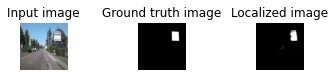

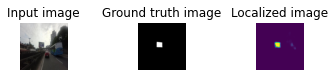

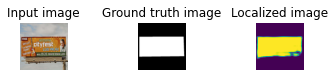

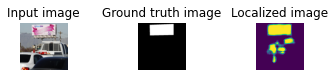

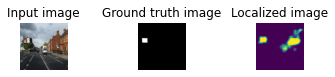

In [ ]:
#predict random image

from keras.models import load_model
import h5py
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize
import matplotlib.pyplot as plt
from random import randrange
from PIL import Image
from keras.utils import CustomObjectScope


with CustomObjectScope({'iou': iou}):
 adsegnetModel = load_model("/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/model/model_adsegnet.h5")
dims = [128,128] #dimension

img_name_location = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_2623.jpg'
original_img = load_img(img_name_location)
#print(original_img.size)
#print("width:", original_img.size[0])
#print("height:",original_img.size[1])
resizedwidth=dims[0]
wpercent = (resizedwidth/float(original_img.size[0]))
resizedheight = int((float(original_img.size[0])*float(wpercent)))
#print(wpercent)
#print("resizedwidth:",resizedwidth)
#print("resizedheight:",resizedheight)
resized_img = original_img.resize((resizedwidth,resizedheight), Image.ANTIALIAS)
array_img = img_to_array(resized_img)/255


mask_name_location = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/scene_2623.jpg'
original_mask = load_img(mask_name_location)
resized_mask = original_mask.resize((resizedwidth,resizedheight), Image.ANTIALIAS)
array_mask = img_to_array(resized_mask)/255

test_image = np.expand_dims(array_img, axis=0)
show_test_image = np.squeeze(test_image)

decoded_img = linknetModel.predict(test_image)
show_decoded_image = np.squeeze(decoded_img)


#-------------2nd set-------------------#


img_name_location1 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_2687.jpg'
original_img1 = load_img(img_name_location1)
#print(original_img1.size)
#print("width:", original_img1.size[0])
#print("height:",original_img1.size[1])
resizedwidth1=dims[0]
wpercent1 = (resizedwidth1/float(original_img1.size[0]))
resizedheight1 = int((float(original_img1.size[0])*float(wpercent1)))
#print(wpercent1)
#print("resizedwidth:",resizedwidth1)
#print("resizedheight:",resizedheight1)
resized_img1 = original_img1.resize((resizedwidth1,resizedheight1), Image.ANTIALIAS)
array_img1 = img_to_array(resized_img1)/255


mask_name_location1 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/scene_2687.jpg'
original_mask1 = load_img(mask_name_location1)
resized_mask1 = original_mask1.resize((resizedwidth1,resizedheight1), Image.ANTIALIAS)
array_mask1 = img_to_array(resized_mask1)/255

test_image1 = np.expand_dims(array_img1, axis=0)
show_test_image1 = np.squeeze(test_image1)

decoded_img1 = linknetModel.predict(test_image1)
show_decoded_image1 = np.squeeze(decoded_img1)

#-------------3rd set-------------------#


img_name_location2 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_104.jpg'
original_img2 = load_img(img_name_location2)
#print(original_img1.size)
#print("width:", original_img1.size[0])
#print("height:",original_img1.size[1])
resizedwidth2=dims[0]
wpercent2 = (resizedwidth2/float(original_img2.size[0]))
resizedheight2 = int((float(original_img2.size[0])*float(wpercent2)))
#print(wpercent1)
#print("resizedwidth:",resizedwidth1)
#print("resizedheight:",resizedheight1)
resized_img2 = original_img2.resize((resizedwidth2,resizedheight2), Image.ANTIALIAS)
array_img2 = img_to_array(resized_img2)/255


mask_name_location2 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/scene_104.jpg'
original_mask2 = load_img(mask_name_location2)
resized_mask2 = original_mask2.resize((resizedwidth2,resizedheight2), Image.ANTIALIAS)
array_mask2 = img_to_array(resized_mask2)/255

test_image2 = np.expand_dims(array_img2, axis=0)
show_test_image2 = np.squeeze(test_image2)

decoded_img2 = linknetModel.predict(test_image2)
show_decoded_image2 = np.squeeze(decoded_img2)


#-------------4th set-------------------#


img_name_location3 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_139.jpg'
original_img3 = load_img(img_name_location3)
#print(original_img1.size)
#print("width:", original_img1.size[0])
#print("height:",original_img1.size[1])
resizedwidth3=dims[0]
wpercent3= (resizedwidth2/float(original_img3.size[0]))
resizedheight3 = int((float(original_img3.size[0])*float(wpercent3)))
#print(wpercent1)
#print("resizedwidth:",resizedwidth1)
#print("resizedheight:",resizedheight1)
resized_img3 = original_img3.resize((resizedwidth3,resizedheight3), Image.ANTIALIAS)
array_img3 = img_to_array(resized_img3)/255


mask_name_location3 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/scene_139.jpg'
original_mask3 = load_img(mask_name_location3)
resized_mask3 = original_mask3.resize((resizedwidth3,resizedheight3), Image.ANTIALIAS)
array_mask3 = img_to_array(resized_mask3)/255

test_image3 = np.expand_dims(array_img3, axis=0)
show_test_image3 = np.squeeze(test_image3)

decoded_img3 = linknetModel.predict(test_image3)
show_decoded_image3 = np.squeeze(decoded_img3)

#-------------5th set-------------------#


img_name_location4 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_3872.jpg'
original_img4 = load_img(img_name_location4)
#print(original_img1.size)
#print("width:", original_img1.size[0])
#print("height:",original_img1.size[1])
resizedwidth4=dims[0]
wpercent4= (resizedwidth4/float(original_img4.size[0]))
resizedheight4 = int((float(original_img4.size[0])*float(wpercent4)))
#print(wpercent1)
#print("resizedwidth:",resizedwidth1)
#print("resizedheight:",resizedheight1)
resized_img4 = original_img4.resize((resizedwidth4,resizedheight4), Image.ANTIALIAS)
array_img4 = img_to_array(resized_img4)/255


mask_name_location4 = '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_masks_single/scene_3872.jpg'
original_mask4 = load_img(mask_name_location4)
resized_mask4 = original_mask4.resize((resizedwidth4,resizedheight4), Image.ANTIALIAS)
array_mask4 = img_to_array(resized_mask4)/255

test_image4 = np.expand_dims(array_img4, axis=0)
show_test_image4 = np.squeeze(test_image4)

decoded_img4 = linknetModel.predict(test_image4)
show_decoded_image4 = np.squeeze(decoded_img4)




#plt.figure(1)
plt.subplot(431)
plt.imshow(array_img)
plt.axis('off')
plt.title('Input image')
#plt.show()


#plt.figure(2)
plt.subplot(432)
plt.imshow(array_mask)
plt.axis('off')
plt.title('Ground truth image')
#plt.show()


#plt.figure(3)
plt.subplot(433)
plt.imshow(show_decoded_image, cmap="Greys_r")
plt.axis('off')
plt.title('Localized image')
plt.show()
#cmap = plt.cm.jet

#------2nd set ----#

#plt.figure(1)
plt.subplot(431)
plt.imshow(array_img1)
plt.axis('off')
plt.title('Input image')
#plt.show()


#plt.figure(2)
plt.subplot(432)
plt.imshow(array_mask1)
plt.axis('off')
plt.title('Ground truth image')
#plt.show()


#plt.figure(3)
plt.subplot(433)
plt.imshow(show_decoded_image1)
plt.axis('off')
plt.title('Localized image')
plt.show()

#------3rd set ----#

#plt.figure(1)
plt.subplot(431)
plt.imshow(array_img2)
plt.axis('off')
plt.title('Input image')
#plt.show()


#plt.figure(2)
plt.subplot(432)
plt.imshow(array_mask2)
plt.axis('off')
plt.title('Ground truth image')
#plt.show()


#plt.figure(3)
plt.subplot(433)
plt.imshow(show_decoded_image2)
plt.axis('off')
plt.title('Localized image')
plt.show()

#------4th set ----#

#plt.figure(1)
plt.subplot(431)
plt.imshow(array_img3)
plt.axis('off')
plt.title('Input image')
#plt.show()


#plt.figure(2)
plt.subplot(432)
plt.imshow(array_mask3)
plt.axis('off')
plt.title('Ground truth image')
#plt.show()


#plt.figure(3)
plt.subplot(433)
plt.imshow(show_decoded_image3)
plt.axis('off')
plt.title('Localized image')
plt.show()

#------5th set ----#

#plt.figure(1)
plt.subplot(431)
plt.imshow(array_img4)
plt.axis('off')
plt.title('Input image')
#plt.show()


#plt.figure(2)
plt.subplot(432)
plt.imshow(array_mask4)
plt.axis('off')
plt.title('Ground truth image')
#plt.show()


#plt.figure(3)
plt.subplot(433)
plt.imshow(show_decoded_image4)
plt.axis('off')
plt.title('Localized image')
plt.show()


In [ ]:
#predict

import os
import cv2
import numpy as np
import tensorflow as tf

from tqdm import tqdm
from keras.utils import CustomObjectScope
#from Data import load_data, tf_dataset
#from Train import iou
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
#ROC
from sklearn.metrics import roc_curve

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)


def read_image(PATH):
    x = cv2.imread(PATH, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (128, 128))
    print("image shape:",x.shape)
    x = x/255.0
    return x


def read_mask(PATH):
    x = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (128, 128))
    print("mask:",x.shape)
    #x = x/255.0
    x = np.expand_dims(x, axis=-1)
    return x


def mask_parse(mask):
    mask = np.squeeze(mask)
    mask = [mask, mask, mask]
    mask = np.transpose(mask, (1, 2, 0))
    return mask




if __name__ == "__main__":
    np.random.seed(42)
    tf.random.set_seed(42)

    PATH = "/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/datasets/"
    BATCH = 8

    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(PATH)
    
    test_dataset = tf_dataset(test_x, test_y)#, batch=BATCH)
    
    test_steps = len(test_x) // BATCH
    print("test steps:", test_steps)
    print("len of testx:", len(test_x))
    print("len of testy:", len(test_y))

    if len(test_x) % BATCH != 0:
        test_steps += 1
    
    for tx, ty in test_dataset:
        print('tx shape:', tx.shape)
        print('ty shape:', ty.shape)
        break
    
    
'''
    with CustomObjectScope({'iou': iou}):
      
      model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/model/model_adsegnet.h5")
    #model.evaluate(test_dataset, steps=test_steps)
    #model.evaluate(test_dataset, steps=test_steps)
'''  
  

'''
    for i, (x, y) in tqdm(enumerate(zip(test_x, test_y)), total=len(test_x)):
        x = read_image(x)
        y = read_mask(y)
      
        #y_pred = model.predict(np.expand_dims(x, axis=0))
        #y_pred = y_pred[0] > 0.5
        y_pred = (model.predict(np.expand_dims(x, axis=0))>= 0.5).astype(int)
        print('y_pred shape:', y_pred.shape)
        y_pred = y_pred.reshape(y_pred.shape[1:])
        print('y_pred reshape:', y_pred.shape)
        #cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/My work/billboard_segnet/segnet_results/Results_{i}.png", y_pred)
        #plt.savefig("/content/drive/MyDrive/Colab Notebooks/My work/billboard_segnet/segnet_results/Results_{i}.png")

        # cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/results/original/scene_{i}.png", x)
        # cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/results/mask/scene_{i}.png", y)
        # cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/results/predictedmask/scene_pred_{i}.png", y_pred)


        cm=confusion_matrix(y, y_pred)  
        sns.heatmap(cm, annot=True)
'''
'''
        h, w, _ = x.shape

        white_line = np.ones((h, 10, 3)) * 255.0
        all_images = [
                x * 255.0, white_line,
                mask_parse(y), white_line,
                mask_parse(y_pred) * 255.0
        ]
        image = np.concatenate(all_images, axis=0)
        cv2.imwrite(f"/content/drive/MyDrive/Colab Notebooks/My work/billboard_adsegnet/adsegnet_results/Results_{i}.png", image)
'''
        


['/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_0.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_1.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_2.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_3.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_4.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_5.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_6.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_7.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resized_images_single/scene_8.jpg', '/content/drive/MyDrive/Colab Notebooks/My work/billboard_datasets/resiz

InvalidArgumentError: ignored